All packages imported successfully!

RETURN & VOLATILITY CALCULATOR
1. Single Stock Analysis
2. Compare Two Stocks
3. Stock vs Market Index (SPY)
4. Exit



Select option (1-4):  1
Enter stock ticker (e.g., AAPL):  3
Enter period (1y, 2y, 5y):  pg


Fetching data for 3...


HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 3"}}}
$3: possibly delisted; no price data found  (period=pg) (Yahoo error = "No data found, symbol may be delisted")


No data found for 3

RETURN & VOLATILITY CALCULATOR
1. Single Stock Analysis
2. Compare Two Stocks
3. Stock vs Market Index (SPY)
4. Exit



Select option (1-4):  1
Enter stock ticker (e.g., AAPL):  PG
Enter period (1y, 2y, 5y):  1y


Fetching data for PG...
Success! Retrieved 250 trading days
Date range: 2024-11-13 to 2025-11-12
Calculated daily returns (249 data points)

PERFORMANCE METRICS for PG
Total Return (%)         :    -8.80%
Average Daily Return (%) :    -0.03%
Daily Return Std Dev (%) :     1.16%
Annualized Volatility (%):    18.43%
Sharpe Ratio             :    -0.41
Min Daily Return (%)     :    -5.01%
Max Daily Return (%)     :     3.38%
Positive Days (%)        :     53.8%
Negative Days (%)        :     46.2%
Skewness                 :    -0.64
Kurtosis                 :     2.08


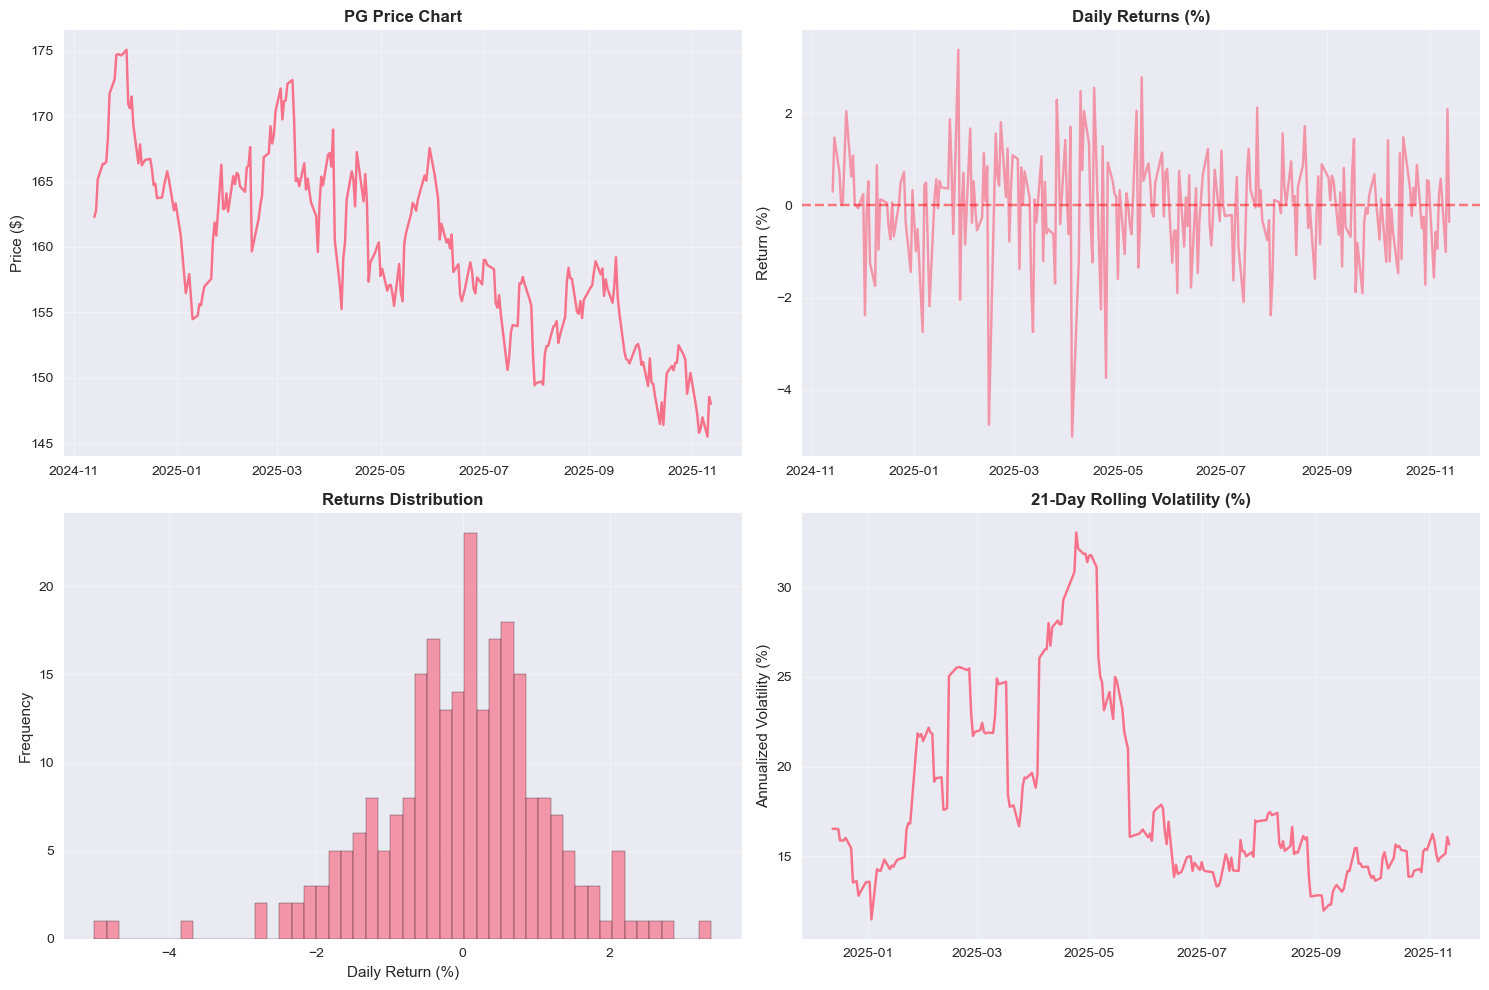


Recent Daily Returns for PG:
2025-10-30: +0.54%
2025-10-31: +0.53%
2025-11-03: -1.56%
2025-11-04: -0.57%
2025-11-05: -0.94%
2025-11-06: +0.23%
2025-11-07: +0.58%
2025-11-10: -1.01%
2025-11-11: +2.09%
2025-11-12: -0.36%

RETURN & VOLATILITY CALCULATOR
1. Single Stock Analysis
2. Compare Two Stocks
3. Stock vs Market Index (SPY)
4. Exit



Select option (1-4):  1
Enter stock ticker (e.g., AAPL):  pg
Enter period (1y, 2y, 5y):  25y


Fetching data for PG...
Success! Retrieved 6287 trading days
Date range: 2000-11-13 to 2025-11-12
Calculated daily returns (6286 data points)

PERFORMANCE METRICS for PG
Total Return (%)         :   697.88%
Average Daily Return (%) :     0.04%
Daily Return Std Dev (%) :     1.17%
Annualized Volatility (%):    18.61%
Sharpe Ratio             :     0.54
Min Daily Return (%)     :    -8.74%
Max Daily Return (%)     :    12.01%
Positive Days (%)        :     51.9%
Negative Days (%)        :     47.3%
Skewness                 :     0.03
Kurtosis                 :     8.60


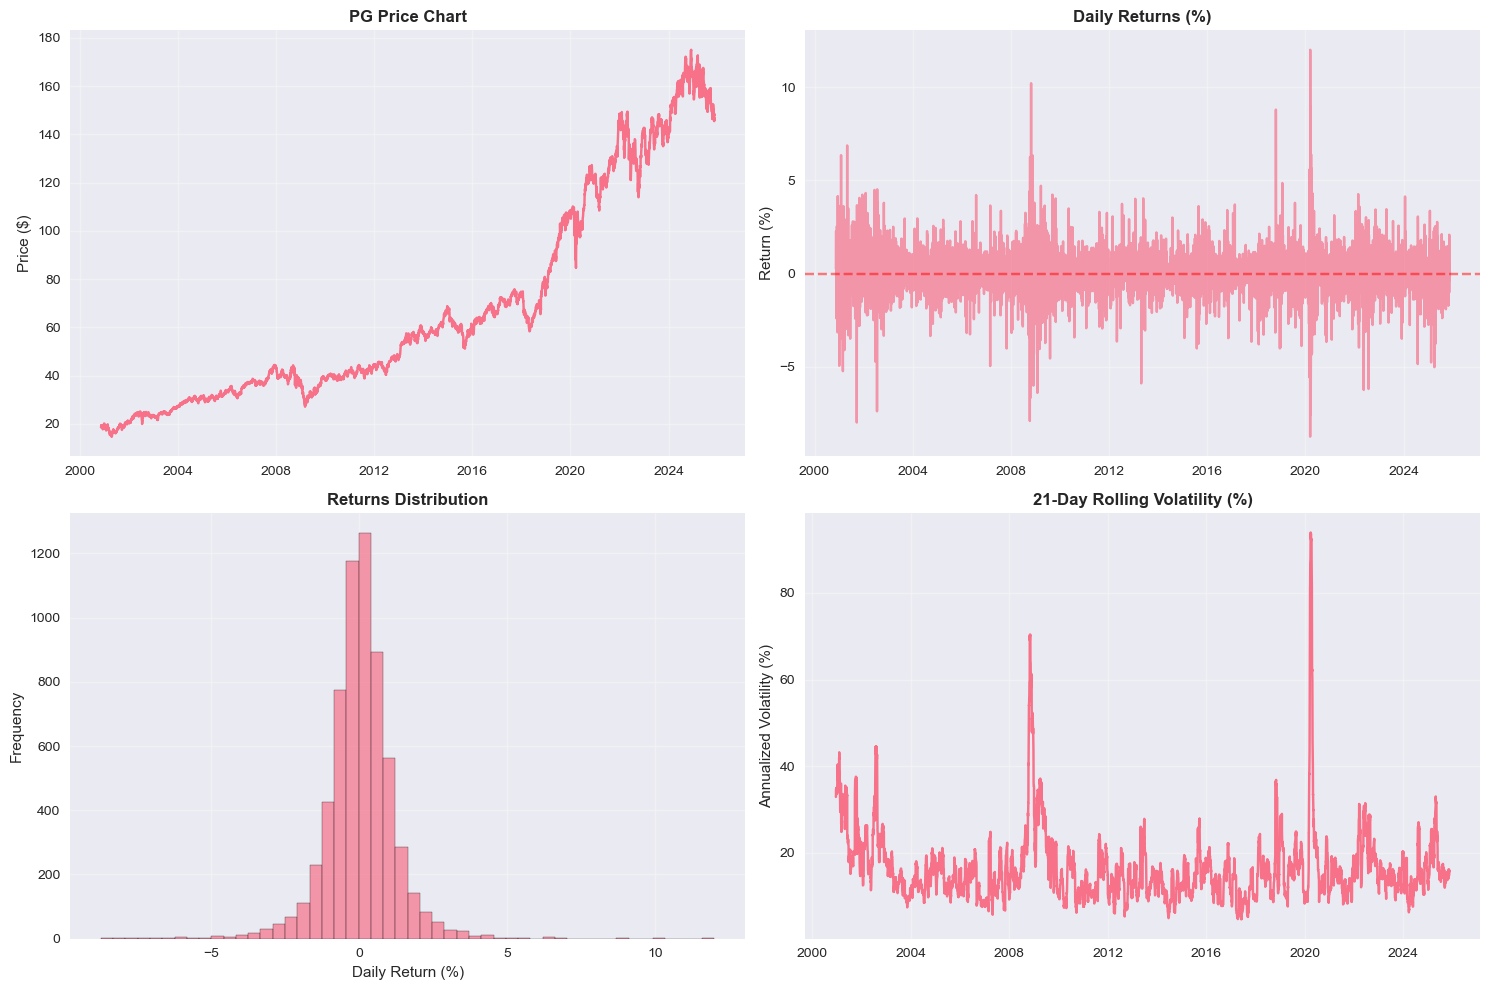


Recent Daily Returns for PG:
2025-10-30: +0.54%
2025-10-31: +0.53%
2025-11-03: -1.56%
2025-11-04: -0.57%
2025-11-05: -0.94%
2025-11-06: +0.23%
2025-11-07: +0.58%
2025-11-10: -1.01%
2025-11-11: +2.09%
2025-11-12: -0.36%

RETURN & VOLATILITY CALCULATOR
1. Single Stock Analysis
2. Compare Two Stocks
3. Stock vs Market Index (SPY)
4. Exit


In [ ]:
## -*- coding: utf-8 -*-
"""
Created on Mon Sep 29 01:24:39 2025

@author: manny
"""
try:
    import yfinance as yf
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    print("All packages imported successfully!")
    
except ImportError as e:
    print(f"Missing package: {e}")
    print("Please install missing packages in Anaconda Prompt:")
    print("pip install yfinance scipy")
    exit()

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class StockAnalyzer:
    def __init__(self, ticker, period="1y"):
        self.ticker = ticker
        self.period = period
        self.data = None
        self.returns = None
        self.metrics = {}
        
    def fetch_data(self):
        """Fetch stock data from Yahoo Finance"""
        try:
            print(f"Fetching data for {self.ticker}...")
            stock = yf.Ticker(self.ticker)
            self.data = stock.history(period=self.period)
            
            if self.data.empty:
                print(f"No data found for {self.ticker}")
                return False
                
            # Check if we have sufficient data
            if len(self.data) < 10:
                print(f"Insufficient data for {self.ticker}. Only {len(self.data)} days available.")
                return False
                
            print(f"Success! Retrieved {len(self.data)} trading days")
            print(f"Date range: {self.data.index[0].strftime('%Y-%m-%d')} to {self.data.index[-1].strftime('%Y-%m-%d')}")
            return True
            
        except Exception as e:
            print(f"Error fetching {self.ticker}: {e}")
            return False
    
    def calculate_returns(self, return_type='daily'):
        """Calculate returns based on specified period"""
        if self.data is None:
            print("No data available. Please fetch data first.")
            return False
            
        if len(self.data) < 2:
            print("Insufficient data points to calculate returns.")
            return False
            
        try:
            if return_type == 'daily':
                self.returns = self.data['Close'].pct_change().dropna()
            elif return_type == 'weekly':
                self.returns = self.data['Close'].pct_change(periods=5).dropna()
            elif return_type == 'monthly':
                self.returns = self.data['Close'].pct_change(periods=21).dropna()
            else:
                print("Invalid return type. Use 'daily', 'weekly', or 'monthly'")
                return False
                
            print(f"Calculated {return_type} returns ({len(self.returns)} data points)")
            return True
            
        except Exception as e:
            print(f"Error calculating returns: {e}")
            return False
    
    def calculate_volatility(self, window=21):
        """Calculate rolling volatility"""
        if self.returns is None or len(self.returns) < window:
            print("No returns data available or insufficient data for volatility calculation.")
            return None
            
        try:
            # Annualize the volatility (assuming 252 trading days)
            rolling_volatility = self.returns.rolling(window=window).std() * np.sqrt(252)
            return rolling_volatility.dropna()
        except Exception as e:
            print(f"Error calculating volatility: {e}")
            return None
    
    def calculate_metrics(self):
        """Calculate comprehensive return and volatility metrics"""
        if self.returns is None or len(self.returns) == 0:
            print("Please calculate returns first.")
            return False
            
        try:
            total_return = (self.data['Close'].iloc[-1] / self.data['Close'].iloc[0] - 1) * 100
            
            self.metrics = {
                'Total Return (%)': total_return,
                'Average Daily Return (%)': self.returns.mean() * 100,
                'Daily Return Std Dev (%)': self.returns.std() * 100,
                'Annualized Volatility (%)': self.returns.std() * np.sqrt(252) * 100,
                'Sharpe Ratio': (self.returns.mean() / self.returns.std()) * np.sqrt(252) if self.returns.std() != 0 else 0,
                'Min Daily Return (%)': self.returns.min() * 100,
                'Max Daily Return (%)': self.returns.max() * 100,
                'Positive Days (%)': (self.returns > 0).sum() / len(self.returns) * 100,
                'Negative Days (%)': (self.returns < 0).sum() / len(self.returns) * 100,
                'Skewness': stats.skew(self.returns.dropna()) if len(self.returns.dropna()) > 0 else 0,
                'Kurtosis': stats.kurtosis(self.returns.dropna()) if len(self.returns.dropna()) > 0 else 0
            }
            
            return True
            
        except Exception as e:
            print(f"Error calculating metrics: {e}")
            return False
    
    def display_metrics(self):
        """Display calculated metrics in a formatted way"""
        if not self.metrics:
            print("No metrics available. Please calculate metrics first.")
            return
            
        print(f"\nPERFORMANCE METRICS for {self.ticker}")
        print("=" * 50)
        
        for key, value in self.metrics.items():
            if 'Return' in key or 'Volatility' in key:
                print(f"{key:<25}: {value:>8.2f}%")
            elif 'Ratio' in key:
                print(f"{key:<25}: {value:>8.2f}")
            elif 'Days' in key:
                print(f"{key:<25}: {value:>8.1f}%")
            else:
                print(f"{key:<25}: {value:>8.2f}")
    
    def plot_returns_analysis(self):
        """Create comprehensive returns visualization"""
        if self.returns is None or len(self.returns) == 0:
            print("No returns data available.")
            return False
            
        try:
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
            
            # Plot 1: Price chart
            ax1.plot(self.data.index, self.data['Close'])
            ax1.set_title(f'{self.ticker} Price Chart', fontweight='bold')
            ax1.set_ylabel('Price ($)')
            ax1.grid(True, alpha=0.3)
            
            # Plot 2: Daily returns
            ax2.plot(self.returns.index, self.returns * 100, alpha=0.7)
            ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
            ax2.set_title('Daily Returns (%)', fontweight='bold')
            ax2.set_ylabel('Return (%)')
            ax2.grid(True, alpha=0.3)
            
            # Plot 3: Returns distribution
            ax3.hist(self.returns * 100, bins=50, alpha=0.7, edgecolor='black')
            ax3.set_title('Returns Distribution', fontweight='bold')
            ax3.set_xlabel('Daily Return (%)')
            ax3.set_ylabel('Frequency')
            ax3.grid(True, alpha=0.3)
            
            # Plot 4: Rolling volatility
            rolling_vol = self.calculate_volatility(window=21)
            if rolling_vol is not None and len(rolling_vol) > 0:
                ax4.plot(rolling_vol.index, rolling_vol * 100)
                ax4.set_title('21-Day Rolling Volatility (%)', fontweight='bold')
                ax4.set_ylabel('Annualized Volatility (%)')
                ax4.grid(True, alpha=0.3)
            else:
                ax4.text(0.5, 0.5, 'Insufficient data\nfor volatility calculation', 
                        ha='center', va='center', transform=ax4.transAxes)
                ax4.set_title('21-Day Rolling Volatility', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
            return True
            
        except Exception as e:
            print(f"Error creating plots: {e}")
            return False

def compare_stocks(ticker1, ticker2, period="1y"):
    """Compare two stocks or a stock vs index"""
    print(f"\nCOMPARING {ticker1} vs {ticker2}")
    print("=" * 50)
    
    # Create analyzer objects
    stock1 = StockAnalyzer(ticker1, period)
    stock2 = StockAnalyzer(ticker2, period)
    
    # Fetch data
    if not stock1.fetch_data():
        print(f"Failed to fetch data for {ticker1}")
        return
        
    if not stock2.fetch_data():
        print(f"Failed to fetch data for {ticker2}")
        return
    
    # Calculate returns and metrics
    if not stock1.calculate_returns('daily') or not stock2.calculate_returns('daily'):
        print("Failed to calculate returns for one or both stocks")
        return
        
    if not stock1.calculate_metrics() or not stock2.calculate_metrics():
        print("Failed to calculate metrics for one or both stocks")
        return
    
    # Create comparison table
    comparison_data = []
    metrics_to_compare = [
        'Total Return (%)', 'Annualized Volatility (%)', 
        'Sharpe Ratio', 'Positive Days (%)'
    ]
    
    for metric in metrics_to_compare:
        comparison_data.append({
            'Metric': metric,
            ticker1: stock1.metrics.get(metric, 0),
            ticker2: stock2.metrics.get(metric, 0),
            'Difference': stock1.metrics.get(metric, 0) - stock2.metrics.get(metric, 0)
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print("\nCOMPARISON TABLE")
    print(comparison_df.to_string(index=False, float_format='%.2f'))
    
    # Plot comparison
    try:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Normalized price comparison
        norm_price1 = stock1.data['Close'] / stock1.data['Close'].iloc[0]
        norm_price2 = stock2.data['Close'] / stock2.data['Close'].iloc[0]
        
        ax1.plot(norm_price1.index, norm_price1, label=ticker1, linewidth=2)
        ax1.plot(norm_price2.index, norm_price2, label=ticker2, linewidth=2)
        ax1.set_title('Normalized Price Comparison', fontweight='bold')
        ax1.set_ylabel('Normalized Price (Base=100)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Returns distribution comparison
        ax2.hist(stock1.returns * 100, bins=50, alpha=0.5, label=ticker1, edgecolor='black')
        ax2.hist(stock2.returns * 100, bins=50, alpha=0.5, label=ticker2, edgecolor='black')
        ax2.set_title('Returns Distribution Comparison', fontweight='bold')
        ax2.set_xlabel('Daily Return (%)')
        ax2.set_ylabel('Frequency')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Correlation analysis
        if (stock1.returns is not None and stock2.returns is not None and 
            len(stock1.returns) > 0 and len(stock2.returns) > 0):
            # Align the dates for correlation calculation
            aligned_returns = pd.DataFrame({
                ticker1: stock1.returns,
                ticker2: stock2.returns
            }).dropna()
            
            if len(aligned_returns) > 0:
                correlation = aligned_returns[ticker1].corr(aligned_returns[ticker2])
                print(f"\nCorrelation between {ticker1} and {ticker2}: {correlation:.3f}")
            else:
                print("\nInsufficient overlapping data for correlation calculation.")
        else:
            print("\nInsufficient returns data for correlation calculation.")
            
    except Exception as e:
        print(f"Error creating comparison plots: {e}")

def single_stock_analysis():
    """Perform analysis on a single stock"""
    ticker = input("Enter stock ticker (e.g., AAPL): ").upper() or "AAPL"
    period = input("Enter period (1y, 2y, 5y): ") or "1y"
    
    analyzer = StockAnalyzer(ticker, period)
    
    if analyzer.fetch_data():
        if analyzer.calculate_returns('daily'):
            if analyzer.calculate_metrics():
                analyzer.display_metrics()
                analyzer.plot_returns_analysis()
                
                # Show recent returns
                print(f"\nRecent Daily Returns for {ticker}:")
                recent_returns = analyzer.returns.tail(10) * 100
                for date, ret in recent_returns.items():
                    sign = "+" if ret > 0 else ""
                    print(f"{date.strftime('%Y-%m-%d')}: {sign}{ret:.2f}%")

def main():
    """Main menu for the Return and Volatility Calculator"""
    while True:
        print("\nRETURN & VOLATILITY CALCULATOR")
        print("=" * 40)
        print("1. Single Stock Analysis")
        print("2. Compare Two Stocks")
        print("3. Stock vs Market Index (SPY)")
        print("4. Exit")
        
        choice = input("\nSelect option (1-4): ").strip()
        
        if choice == '1':
            single_stock_analysis()
            
        elif choice == '2':
            ticker1 = input("Enter first stock ticker (e.g., AAPL): ").upper() or "AAPL"
            ticker2 = input("Enter second stock ticker (e.g., GOOGL): ").upper() or "GOOGL"
            period = input("Enter period (1y, 2y, 5y): ") or "1y"
            compare_stocks(ticker1, ticker2, period)
            
        elif choice == '3':
            stock = input("Enter stock ticker (e.g., TSLA): ").upper() or "TSLA"
            period = input("Enter period (1y, 2y, 5y): ") or "1y"
            compare_stocks(stock, "SPY", period)  # SPY is S&P 500 ETF
            
        elif choice == '4':
            print("Thank you for using the calculator!")
            break
            
        else:
            print("Invalid choice. Please select 1-4.")

# Run the main function
if __name__ == "__main__":
    main()
    